This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
(len(train_images), 784)

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_labels.shape

(60000,)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 19ms/step - loss: 0.6133 - accuracy: 0.8135 - val_loss: 0.2788 - val_accuracy: 0.9146
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2432 - accuracy: 0.9237 - val_loss: 0.2751 - val_accuracy: 0.9094
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1608 - accuracy: 0.9496 - val_loss: 0.1557 - val_accuracy: 0.9546
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1113 - accuracy: 0.9657 - val_loss: 0.1783 - val_accuracy: 0.9456
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0798 - accuracy: 0.9742 - val_loss: 0.1446 - val_accuracy: 0.9587
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0585 - accuracy: 0.9808 - val_loss: 0.1395 - val_accuracy: 0.9616
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.1852 - val_accuracy: 0.9515

In [7]:
model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.2876 - accuracy: 0.9169 - val_loss: 0.1505 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1188 - accuracy: 0.9649 - val_loss: 0.1069 - val_accuracy: 0.9685
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0772 - accuracy: 0.9771 - val_loss: 0.0901 - val_accuracy: 0.9735
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0890 - val_accuracy: 0.9735
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0820 - val_accuracy: 0.9776
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.0877 - val_accuracy: 0.9772

**Plotting a validation accuracy comparison**

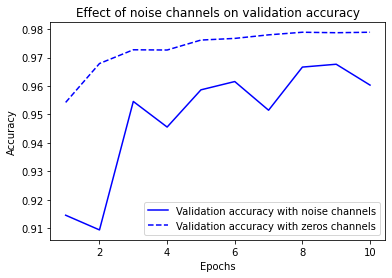

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

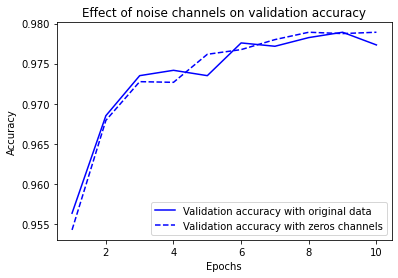

In [11]:
val_acc1 = history.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc1, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3176 - accuracy: 0.1035 - val_loss: 2.3065 - val_accuracy: 0.1032
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3005 - accuracy: 0.1181 - val_loss: 2.3112 - val_accuracy: 0.1029
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2906 - accuracy: 0.1277 - val_loss: 2.3191 - val_accuracy: 0.1014
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2766 - accuracy: 0.1405 - val_loss: 2.3265 - val_accuracy: 0.1015
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2594 - accuracy: 0.1538 - val_loss: 2.3353 - val_accuracy: 0.1040
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2385 - accuracy: 0.1670 - val_loss: 2.3502 - val_accuracy: 0.1018
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2132 - accuracy: 0.1827 - val_loss: 2.3687 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), ## learning rate(학습률)이 엄청 높기에 정확도가 늘지 않는다.
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 1125.5430 - accuracy: 0.3967 - val_loss: 2.3097 - val_accuracy: 0.3309
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 5.5861 - accuracy: 0.2471 - val_loss: 2.9681 - val_accuracy: 0.3332
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 2.9992 - accuracy: 0.2687 - val_loss: 2.2830 - val_accuracy: 0.1970
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 2.7160 - accuracy: 0.2473 - val_loss: 2.5587 - val_accuracy: 0.2797
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 2.5373 - accuracy: 0.2853 - val_loss: 2.1055 - val_accuracy: 0.2854
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 2.7638 - accuracy: 0.2683 - val_loss: 2.5407 - val_accuracy: 0.2779
Epoch 7/10
375/375 [==============================] - 7s 17ms/step - loss: 2.6024 - accuracy: 0.2661 - val_loss: 3.2950 - val_accuracy: 0.2

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6686 - accuracy: 0.8336 - val_loss: 0.3588 - val_accuracy: 0.9039
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.9038 - val_loss: 0.3079 - val_accuracy: 0.9141
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.9125 - val_loss: 0.2914 - val_accuracy: 0.9188
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.9164 - val_loss: 0.2812 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.9195 - val_loss: 0.2764 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9216 - val_loss: 0.2720 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9224 - val_loss: 0.2695 - val_accuracy: 0.9252
Epoch 

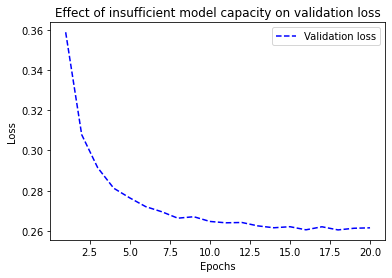

In [15]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3654 - accuracy: 0.8964 - val_loss: 0.1963 - val_accuracy: 0.9435
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1671 - accuracy: 0.9504 - val_loss: 0.1392 - val_accuracy: 0.9577
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1191 - accuracy: 0.9648 - val_loss: 0.1292 - val_accuracy: 0.9613
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.9729 - val_loss: 0.1029 - val_accuracy: 0.9683
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.1029 - val_accuracy: 0.9705
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0990 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.1015 - val_accuracy: 0.9717
Epoch 

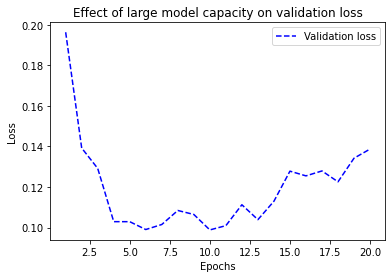

In [18]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 87ms/step - loss: 0.5114 - accuracy: 0.7809 - val_loss: 0.3740 - val_accuracy: 0.8760
Epoch 2/20
30/30 [==============================] - 2s 71ms/step - loss: 0.3014 - accuracy: 0.9043 - val_loss: 0.3167 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2258 - accuracy: 0.9258 - val_loss: 0.2822 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1744 - accuracy: 0.9441 - val_loss: 0.2802 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1407 - accuracy: 0.9534 - val_loss: 0.2847 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1151 - accuracy: 0.9639 - val_loss: 0.2952 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0956 - accurac

**Version of the model with lower capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.6125 - accuracy: 0.6787 - val_loss: 0.5567 - val_accuracy: 0.7259
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5122 - accuracy: 0.8143 - val_loss: 0.5119 - val_accuracy: 0.8370
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4677 - accuracy: 0.8669 - val_loss: 0.4904 - val_accuracy: 0.8474
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4357 - accuracy: 0.8961 - val_loss: 0.4927 - val_accuracy: 0.8235
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4105 - accuracy: 0.9139 - val_loss: 0.4690 - val_accuracy: 0.8651
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3895 - accuracy: 0.9314 - val_loss: 0.4780 - val_accuracy: 0.8485
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3716 - accuracy: 0.9399 - val_loss: 0.4767 - val_accuracy: 0.8533
Epoch 8/20
30

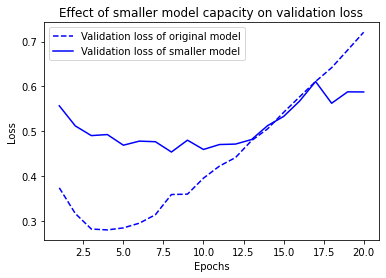

In [21]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [22]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 14s 446ms/step - loss: 0.5568 - accuracy: 0.7659 - val_loss: 0.3225 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 11s 359ms/step - loss: 0.2559 - accuracy: 0.8997 - val_loss: 0.2842 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 10s 323ms/step - loss: 0.1502 - accuracy: 0.9483 - val_loss: 0.3305 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 9s 304ms/step - loss: 0.0872 - accuracy: 0.9725 - val_loss: 0.3713 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 9s 302ms/step - loss: 0.1171 - accuracy: 0.9794 - val_loss: 0.3648 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 9s 314ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.5089 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 9s 303ms/step - loss: 9.0318e-04 - accuracy: 0.9999 - val_loss: 0.6053 - val_accuracy: 0.8889

In [1]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: ignored

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model of l2 regularization")
plt.title("Effect of l2 regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model of dropout")
plt.title("Effect of dropout regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary